----
# Wprowadzenie - część 2
----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów wydziału Informatyki i Telekomunikacji Politechniki Poznańskiej 

## 0. Zagadnienia do opanowania przed zajęciami
### 0.1. Zapoznanie z podstawami językiem programowania *Python*
https://www.w3schools.com/python/python_intro.asp  
### 0.2. Zapoznanie z postawami biblioteki *numpy*
https://www.w3schools.com/python/numpy_intro.asp  
https://numpy.org/devdocs/user/quickstart.html  

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
default_figsize=(14, 8)

test_vec =  np.array([-1, 1, 0, 4, -3, -6, 7, 9, 1, 4, -9, -5])
test_poly = np.poly1d([1, 2, -5])

----
## 1. Zadania do samodzielnego wykonania
----
### Zadanie A
Napisz i przetestuj funkcję traktującą wejściowy wektor jako próbki przebiegu funkcji i rysującą jej wykres w postaci punktów z 10% zapasem na osi.


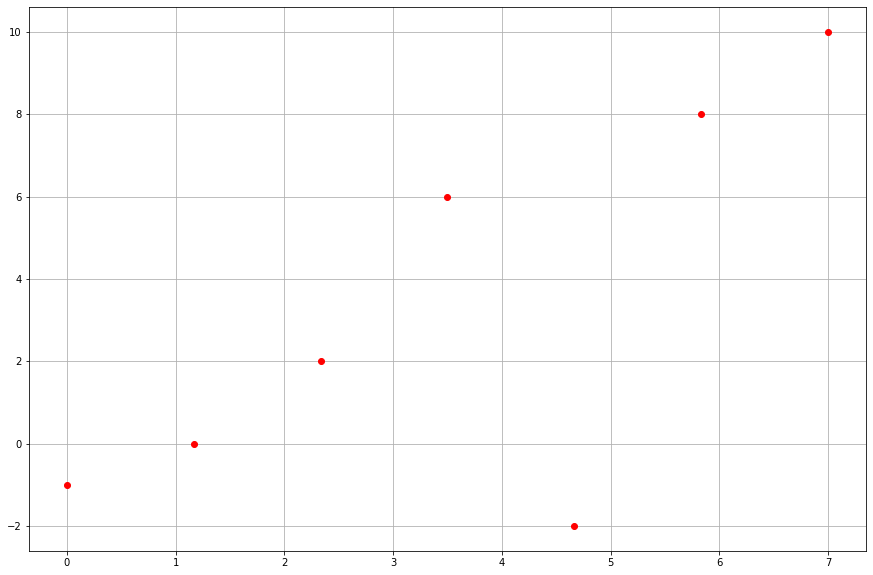

In [24]:
#każdej wartośći funkcji przypisujemy jedno miejce
def taskA(y):
    fig = plt.figure(figsize=(15,10))
    y = [-1,0,2,6,-2,8,10]
    x = np.linspace(0, len(y), len(y))
    grid=plt.GridSpec(1,1)
    siatka_wykres = plt.subplot(grid[0,0])
    siatka_wykres.plot(x,y, 'ro')
    plt.grid()
    

taskA(test_vec)


### Zadanie B
Napisz i przetestuj funkcję sortującą i wypisującą elementy wektora wejściowego w porządku zgodnym ze wzrostem modułu.  

Demonstaracja działania najpopularniejszych algorytmów sortowania https://www.toptal.com/developers/sorting-algorithms/


In [6]:
def taskB(data):
    len_data = len(data)
    for i in range (len_data-1):
        for j in range(0, len_data-i-1):
             if abs(data[j]) > abs(data[j + 1]) :
                data[j], data[j + 1] = data[j + 1], data[j]
    print(data)

taskB(test_vec)

[ 0 -1  1  1 -3  4  4 -5 -6  7  9 -9]


### Zadanie C
Napisz i przetestuj funkcję wyznaczającą pierwiastki wielomianu kwadratowego opisanego wektorem wejściowym (uwaga - nie wolno wykorzystywać funkcji roots), oraz generującą jego wykres (w zakresie $<-4,4>$).

x1:  1.4494897427831779
x2:  -3.449489742783178


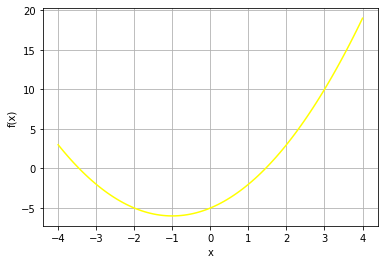

In [33]:
import math

def taskC(polynom):
    a = polynom[2] #x^2
    b = polynom[1] #x
    c = polynom[0]   #wyraz wolny - bierze w takiej kolejności jak wielomian, a nie jak wektor x^2 + 2x - 5
    delta = (-b)**2 - 4*a*c
    x1 = (-b + np.sqrt(delta))/(2*a)
    x2 = (-b - np.sqrt(delta))/(2*a)
    print ("x1: ", x1)
    print ("x2: ", x2)
    x = np.linspace(-4,4,100) #zbiór wartości x
    f_x = polynom(x) #zbiór argumentów y
    fig = plt.figure()
    plt.plot(x,f_x, color="yellow")
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("f(x)")
    return

test_poly = np.poly1d([1, 2, -5])
taskC(test_poly)

### Zadanie D
Napisz i przetestuj funkcję o argumentach będących współczynnikami wielomianu kwadratowego oraz zakresem i dokładnością punktów dziedziny, wykreślającą ten wielomian w podanym zakresie.

In [5]:
def taskD(polynom, xrange, num_points):
    return

taskD(test_poly, [-6, 4], 400)

----
## 2. Zadania dodatkowe
----
### Zadanie	E
Napisz i przetestuj funkcję wyliczającą wyznacznik macierzy. Porównać z wynikami generowanymi przez funkcję det().
### Zadanie	F
Napisz prosty kalkulator. Funkcja pobiera argument w postaci  polecenia, np. „3-6” i zwraca wynik działania. Zaimplementować operacje +.-,*,/. 
### Zadanie G
Napisz funkcję tłumaczącą zapis wektorowy wielomianu na zapis tekstowy
### Zadanie H
Napisz funkcję rysującą trójkąt o zadanych (do wyboru):
* długościach 3 boków (tw. cosinusów),
* długościach 2 boków i kąta między nimi (łatwiej).

In [4]:
import numpy as np
def determinant_E(M):
    len_M = len(M) #wielkość macierz zakładamy że jest kwadratowa
    copy_M = np.copy(M) #kopia macierzy z danymi
    for fd in range (len_M): #fd elemnt z głównej przekątnej
        for i in range(fd+1, len_M): #wierze poniżej fd w tej samej kolumnie
            if copy_M[fd][fd] == 0:
                copy_M[fd][fd] = 1.0e-18 #problem dzielenia przez 0
            scaler = copy_M[i][fd] / copy_M[fd][fd] 
            for j in range(len_M):
                copy_M[i][j] = copy_M[i][j] - scaler*copy_M[fd][j]
    det = 1.0
    display("Macierz górnotrójkątna: ", copy_M)
    for i in range(len_M):
        det*=copy_M[i][i] #iloczyn diagonalnej przekątnej
    return det

M = np.array(([1,2,1], [1,1,31], [1,3,1]))
display("Macierz oryginalna: ", M)
det_np = np.linalg.det(M)
#jak będzie blisko 0 to wypisze 0, a nie coś dziwnego 
if np.allclose(det_np, 0):
    print(0.0)
else:
    print("Wyznacznik policzony przy pomocy numpy: ", det_np)

det = determinant_E(M)
print ("Wyznacznik macierzy policzony bez użycia numpy: ", det)


# 1)Dla każdego wiersza poniżej wiersza zawierającego fd tworzymy przelicznik równy (element w wierszu, który jest w tej samej kolumnie co fd ) podzielony przez ( fd ).
# 2)Aktualizujemy każdy wiersz poniżej wiersza z fd za pomocą (bieżący wiersz) – skaler * (wiersz z fd w nim).
# 3)Spowoduje to przesunięcie elementów w każdym wierszu poniżej fd do 0.
# 4)Kiedy przechodzimy do następnego fd , musimy tylko powtórzyć te kroki dla wierszy poniżej wiersza z bieżącym fd .
#Gdy macierz jest w postaci górnego trójkąta, wyznacznikiem jest po prostu iloczyn wszystkich elementów na głównej przekątnej. 

'Macierz oryginalna: '

array([[ 1,  2,  1],
       [ 1,  1, 31],
       [ 1,  3,  1]])

Wyznacznik policzony przy pomocy numpy:  -30.000000000000004


'Macierz górnotrójkątna: '

array([[ 1,  2,  1],
       [ 0, -1, 30],
       [ 0,  0, 30]])

Wyznacznik macierzy policzony bez użycia numpy:  -30.0


In [43]:
def calculator_F(x,operation,y):
    result = 0
    blad = 0
    if(operation == '+'):
        result = x + y
    elif(operation == '-'):
        result = x - y
        
    elif(operation == '*'):
        result = x * y
        
    elif(operation == '/'):
        if y == 0: 
            print("ERROR. Division by 0 attempt.")
            blad = 1
        else: 
            result = x / y
    else:
        print ("ERROR. Bad operation symbol.")
        blad = 1
        
    if blad == 0: 
        print("Wynik: ", result)
    return

x, operation, y = input("Wpisz trzy wartośći. Kolejno pierwszą liczbę, operację (+,-,*,/), drugą liczbę, dane podajemy ze spacją np. 2 * 3: ").split()
x  = float(x)
y = float(y)
calculator_F(x,operation,y)

Wpisz trzy wartośći. Kolejno pierwszą liczbę, operację (+,-,*,/), drugą liczbę, dane podajemy ze spacją np. 2 * 3: 2 - 3
Wynik:  -1.0


In [45]:
    import numpy as np
    def translator_G(poly):
        len_poly = len(poly)
        poly_text = ""
        for i in range (len_poly+1): #pętla po długości tablicy ze współczynnikami wielomianu przy odpowienich potęgach
            if i==0 and poly[i]>0: #wyraz wolny > 0
                poly_text = " + " +  str(poly[0])  #dla wyrazy wolnego jeżeli nie jest to 0 dodaj bez x
            elif i==0 and poly[i]<0: #wyraz wolny < 0
                poly_text =  " " +  str(poly[0]) 
            elif i>0 and poly[i] > 0:  #kolejne współczynniki przy potęgach > 0
                poly_text =  " + " + str(poly[i]) + "x^" + str(i) + str(poly_text) #dla kolejnych wyrazów dodawaj z odpowiednią potęg x
            elif i>0 and poly[i] < 0: #kolejne współczynniki przy potęgach < 0
                poly_text =  " " +  str(poly[i]) + "x^" + str(i) + str(poly_text)
            elif i>=0 and poly[i] == 0: #dla zerowej wartości 
                poly_text =  "" + str(poly_text)
        poly_text = "f(x) = " + str(poly_text)
        print("Zapis tekstowy: ", poly_text)
        return


    poly = np.poly1d([-5,2,-1,0,1,6])
    translator_G(poly)

Zapis tekstowy:  f(x) =  -5x^5 + 2x^4 -1x^3 + 1x^1 + 6


Rozwiązania równania czyli współrzędne x i y:  [(11/4, -3*sqrt(15)/4), (11/4, 3*sqrt(15)/4)]


'Współrzędne pierwsze x1 i y1: '

array([[0, 0],
       [2, 0],
       [11/4, -3*sqrt(15)/4]], dtype=object)

'Współrzędne drugie x2 i y2: '

array([[0, 0],
       [2, 0],
       [11/4, 3*sqrt(15)/4]], dtype=object)

Rysunek:


<Figure size 432x288 with 0 Axes>

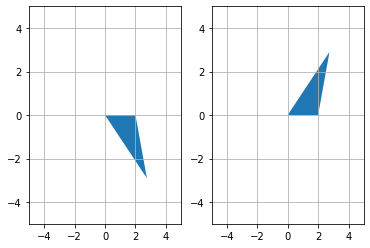

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
def draw_triangle(AB, BC, AC):
    A = (0,0)
    B = (AB, 0) #B przesunięty o długość boku
    x,y = symbols('x y')
    #szukamy x i y czyli przyrównujemy je do znanej długości boku odległość AC, 
    #za pomocą zależnośći P=(p1,p2), Q=(q1,q2) d=AC=sqrt((q1-p1)^2+(q2-p2)^2)
    eq1 = Eq(x**2 + y**2, AC**2) #A=(0,0), #C=(x,y) odpowiednia w python lewa i prawa strona rówania jako argumenty funkcji
    eq2 = Eq((x-AB)**2 + y**2, BC**2) #B=(AB,0), #C=(x,y)
    C = (solve((eq1, eq2), (x,y))) #macierz rozwiązań
    print ("Rozwiązania równania czyli współrzędne x i y: ", C) #policzyliśmy brakujący nieznany nam punkt, a właściewie dwa
    first_triangle = np.array((A, B, C[0])) #Macierz z pierwszym rozwiązaniem C[0] oznacza wybór rozwiązania
    second_triangle = np.array((A, B, C[1]))
    display("Współrzędne pierwsze x1 i y1: ",first_triangle)
    display("Współrzędne drugie x2 i y2: ",second_triangle)
    print("Rysunek:")
    first_draw = plt.Polygon((first_triangle))
    second_draw = plt.Polygon((second_triangle))
    figure = plt.figure()
    fig, ax = plt.subplots(1, 2)
    ax[0].add_patch(first_draw)
    ax[0].grid()
    ax[1].add_patch(second_draw)
    ax[1].grid()
    plt.setp(ax, xlim=[-5,5], ylim=[-5,5]) #ustawia limity do wszytkich subplotów naraz
    return

AB = 2
BC = 3
AC = 4
draw_triangle(AB,BC,AC)

In [66]:
def dzielenie(poly_a, poly_b):
    a = np.poly1d(poly_a)
    b = np.poly1d(poly_b)
    e = a - b
    print("Postać wielomianu")
    print(e)
    display("Postać pythona", e)
    return

poly_a = np.array([1,0,0,0,0,0,0,0,0,-1,0,-3,2])
poly_b = np.array([1,0,0,3,-2])
dzielenie(poly_a, poly_b)

Postać wielomianu
   12     4     3
1 x  - 1 x - 1 x - 6 x + 4


'Postać pythona'

poly1d([ 1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0, -6,  4])